# STATS 131 Final Project: College Scorecard Data

## Team *Fuh-GIT-about-it*

### Group Members: Ignat Kulinka, Brian Lin, Aida Ylanan

# Data Context and Description

## Background Information

The data we chose for the project comes from College Scorecard, a government initiative to provide unbiased and reliable information on the vast number of colleges and universities that operate in the United States. College Scorecard contains a number of metrics that can be used to asses institution’s prior performance, student outcomes and financial costs of attending. The dataset in available publically online and as a measure to protect privacy those metrics in the data set that end up with less than 30 students in the denominator are replaced with a ‘PrivacySuppressed’ label. The data is updated annually but we found the 2014-2015 dataset to be the most completed and used it for our project.

In itself, College Scorecard is made of three smaller dataset that compliment each other. First dataset comes from yearly surveys administered by the Department of Education’s  National Center for Education Statistics (NCES). The data is then collected and stored in the The Integrated Postsecondary Education Data System (IPEDS) which is a part of the NCES . Under the Higher Education Act, all institutions that participate in Title IV federal student aid programs must complete the IPEDS questionnaires. Thus, IPEDS is a great source of institutional statistics such as graduation rates for student subgroups, retention rates, tuition and cost of attendance. The has a severe limitation of only having graduation rates for full-time, first-time students. As a result, some metrics do not include those students who have previous higher education experience, transfer or part-time students.

The second part of the dataset comes from National Student Loan Data System (NSLDS). It is Department of Education’s central database for monitoring federal borrowers and grant recipients from as far back as 1960’s. NSLDS provides important financial metrics such as median loan debt and repayment rates.

The last part of the College Scorecard is the  Administrative Earnings Data from Tax Records maintained by the Department of Treasury. This dataset describes the labor market outcomes for graduates of specific institutions. The data supplied in the College Scorecard contains each schools’ aggregated values for mean/median earnings among workers and percentiles of the earnings distribution for workers. 

**Who collected the data?**   
Department of Education’s National Center for Education Statistics (NCES), National Student Loan Data System (NSLDS) and administrative tax records maintained by the Department of the Treasury. 

**When was the data collected?**   
We chose the most recent and complete dataset which was collected for the 2015-2016 academic year. 

**How was the data collected?**   
The data from National Center for Education Statistics (NCES) is collected through surveys. National Student Loan Data System pulls its data from FAFSA and other financial aid documents. Lastly, the portion of the data that comes from the Department of Treasury comes from W-2’s and other tax forms. 

**Does this have any implications on our analysis?**  
Most importantly, graduation rates are only reported for full-time, first-time students, so graduation rate information is not available for students who may have previous higher education experience or for part-time students.  Another limitation is that outcomes are not recorded for students who transfer from the institution. Thus, we have to be careful when we are generalizing and drawing conclusions from our findings.

Lastly, in order to protect privacy of students any field that has less than 30 people in the denominator is labeled ‘PrivacySuppressed’. This makes our analysis and conclusions only relevant for larger institutions. In addition, the financial information provided by FAFSA and the Department of Treasury only contains information on Title IV students. This means that we can only draw conclusions about those students who are eligible for Federal Financial Aid. 


# Exploratory Data Analysis

## Analysis: Institution Type

### *Guiding Question: What's the difference between private and public schools?* 

To answer this question, we examined the variable *CONTROL*, a string variable that codes for the whether it is: **public**, **private nonprofit**, and **private for-profit**. First, we wanted to gether some basic measurements of the data we found.

In [171]:
# importing/loading python packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# import the dataset
df = pd.read_csv('~/Documents/Stats 131/Most-Recent-Cohorts-All-Data-Elements.csv', low_memory=False)

In [172]:
# average cost of attendance vs median earnings of students after 10 years 

# grab the columns that we want and drop any rows with missing values
cols = ['INSTNM', 'COSTT4_A', 'MD_EARN_WNE_P10', 'CONTROL', 'AVGFACSAL', 'TUITIONFEE_IN', 'TUITIONFEE_OUT', 'PREDDEG']
df_return = df[cols].dropna()

# filter out PrivacySuppressed
df_return = df_return[df_return['MD_EARN_WNE_P10'].apply(str) != 'PrivacySuppressed']

# convert the COSTT4_A and MD_EARN_WNE_P10 to numeric variables
df_return['COSTT4_A'] = pd.to_numeric(df_return['COSTT4_A'])
df_return['MD_EARN_WNE_P10'] = pd.to_numeric(df_return['MD_EARN_WNE_P10'])

# convert CONTROL variable to a discrete variable + change labels
df_return['CONTROL'] = pd.Categorical(df_return['CONTROL'], df_return['CONTROL'].unique())
df_return['CONTROL'] = df_return['CONTROL'].cat.rename_categories(['Public', 'Private nonprofit', 'Private for-profit'])

In [173]:
# there are 3711 colleges in the list now overall
print(df_return.shape)

# the distribution of the dataset
df_return.groupby(by='CONTROL').agg(['count'])

(3458, 8)


,INSTNM,COSTT4_A,MD_EARN_WNE_P10,AVGFACSAL,TUITIONFEE_IN,TUITIONFEE_OUT,PREDDEG
,count,count,count,count,count,count,count
CONTROL,,,,,,,
Public,1535,1535,1535,1535,1535,1535,1535
Private nonprofit,1206,1206,1206,1206,1206,1206,1206
Private for-profit,717,717,717,717,717,717,717


The table and the output above, tells us that the dataset contains information on 3711 institutions. With 1545 of them being public, 1209 private nonprofit and 957 private for-profit. Next we look at the numeric variables we picked to see if there is any difference. Below are some variable definitions as well as the distributions of the numeric variables.

In [174]:
df_return[['COSTT4_A', 'MD_EARN_WNE_P10', 'AVGFACSAL', 'TUITIONFEE_IN', 'TUITIONFEE_OUT']].corr()

,COSTT4_A,MD_EARN_WNE_P10,AVGFACSAL,TUITIONFEE_IN,TUITIONFEE_OUT
COSTT4_A,1.000000,0.565885,0.354659,0.977085,0.919032
MD_EARN_WNE_P10,0.565885,1.000000,0.685844,0.545955,0.657556
AVGFACSAL,0.354659,0.685844,1.000000,0.325122,0.519545
TUITIONFEE_IN,0.977085,0.545955,0.325122,1.000000,0.923681
TUITIONFEE_OUT,0.919032,0.657556,0.519545,0.923681,1.000000


In [175]:
df_return[['COSTT4_A', 'MD_EARN_WNE_P10', 'AVGFACSAL', 'TUITIONFEE_IN', 'TUITIONFEE_OUT']].describe([.75, .90, .98])

,COSTT4_A,MD_EARN_WNE_P10,AVGFACSAL,TUITIONFEE_IN,TUITIONFEE_OUT
count,3458.000000,3458.000000,3458.000000,3458.000000,3458.000000
mean,25752.817235,35898.004627,6536.515616,15047.681608,18100.700983
std,13760.649587,11064.112950,2223.236196,12292.923006,11096.999701
min,4559.000000,12400.000000,1140.000000,580.000000,580.000000
50%,23342.000000,34400.000000,6267.500000,12192.000000,15592.000000
75%,32613.500000,41575.000000,7761.500000,20547.500000,24219.750000
90%,46688.600000,48900.000000,9271.900000,34090.600000,34458.300000
98%,62022.380000,63200.000000,12032.160000,47697.480000,47697.480000
max,67572.000000,122600.000000,21354.000000,53000.000000,53000.000000


In [176]:
df_return[(df_return['MD_EARN_WNE_P10'] > 63000) & 
          (df_return['AVGFACSAL'] > 12032)][['INSTNM', 'COSTT4_A','MD_EARN_WNE_P10', 'CONTROL', 'AVGFACSAL']].head(5)

,INSTNM,COSTT4_A,MD_EARN_WNE_P10,CONTROL,AVGFACSAL
223,California Institute of Technology,60990.0,74200,Private nonprofit,18636.0
280,Claremont McKenna College,64215.0,75000,Private nonprofit,13270.0
336,Harvey Mudd College,66627.0,74200,Private nonprofit,12984.0
483,Santa Clara University,61097.0,69600,Private nonprofit,12133.0
511,University of Southern California,64536.0,70400,Private nonprofit,13461.0


The list of colleges above are the outliers of our dataset. These are colleges which have the highest salaries among graduates after 10 years. In fact all of the colleges in the list are elite private schools. We chose to keep these outliers in the data set to see how these prestigious colleges compare to other cheaper private schools and public schools in other metrics. 

From the table of statistics above we can see a few obvious things like in-state tuition is usually cheaper than out of state. But the table also shows us something interesting, not only are the average faculty salaries exteremely low they are also weakly correlated with annual cost. Meaning that as the tuition goes up, the facualty do not necessarily get payed more. Lastly, we can see that on average schools in our dataset cost around \$25,000 a year and graduates have an average salary of \$35,000.

We chose to further look at the median salaries of graduates and the cost of attendance by using density plots. Right away, we can see that there are two peaks for costs. One peak is around \$15,000 and the other around \$25,000. The median salaries for graduates have most of the mass around \$35,000. Next, using a scatter plot with cost of attendance on the Y-axis and salary of graduates after 10 years on the X-axis. This plot will help us see if there is any patterns in the distributions of schools when we break them up into public, prive nonprofit and private forprofit groups.

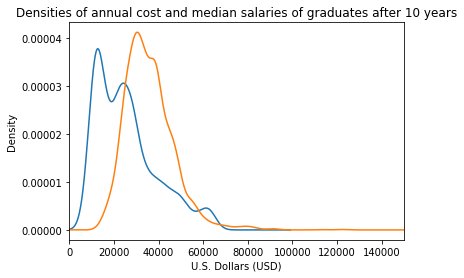

In [177]:
fig, ax = plt.subplots(1,1)
for s in df_return[['COSTT4_A', 'MD_EARN_WNE_P10']].columns:
    df_return[s].plot(kind='density')

ax.set_title('Densities of annual cost and median salaries of graduates after 10 years')
ax.set_xlabel('U.S. Dollars (USD)')
ax.set_xlim((-100, 150000))
plt.show()

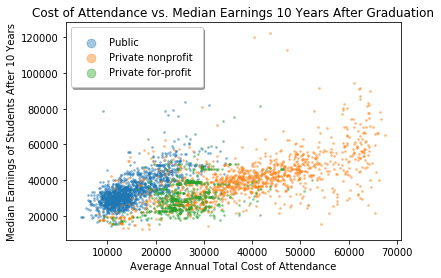

In [178]:
# plot the scatter plot!
fig, ax = plt.subplots()
for c, df in df_return.groupby('CONTROL'):
    ax.scatter(df['COSTT4_A'], df['MD_EARN_WNE_P10'], label=c, alpha=0.4, s=3)
ax.legend()
# make a few fixes to the titles and the legend
ax.legend(fancybox=True, shadow=True, markerscale=5, borderpad=1)
ax.set_title('Cost of Attendance vs. Median Earnings 10 Years After Graduation')
ax.set_xlabel('Average Annual Total Cost of Attendance')
ax.set_ylabel('Median Earnings of Students After 10 Years')
plt.show()

The plot above shows how the three types of schools compare based on the total cost of attendance as well as the median earnings of students 10 years after their graduation. There is a decent amount of grouping among the public schools indicating similar outcomes for most public schools. They tend to be on the left of other schools meaning that they are cheaper on average. In addition, we can see that for public schools as the average cost grows so does the median earnings of graduates demonstrating a good return on investment in higher tuition. On the other hand, the two types of privates schools tend to have much larger spread in annual costs that does not necessarily correspond to an appropriate increase in the median earnings. The row of graphs below plot each of the school types on a separate axis to better illustrate the point.

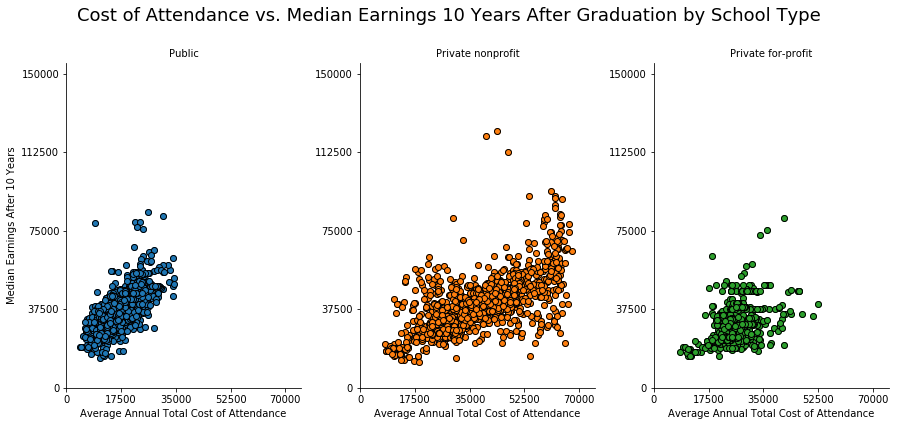

In [179]:
# facet of scatter plots of cost of attendance vs median earnings of students after 10 years 
# facetted across CONTROL of institution

# make the plot
g = sns.lmplot(x='COSTT4_A', y='MD_EARN_WNE_P10', data=df_return, fit_reg=False,
           hue='CONTROL', col='CONTROL', aspect=0.7, size=6)

# outline the points, set and name the axes
g = (g.map(plt.scatter, 'COSTT4_A', 'MD_EARN_WNE_P10', edgecolor="k")
     .set_axis_labels('Average Annual Total Cost of Attendance', 'Median Earnings After 10 Years')
        .set(xlim=(0, 75000), ylim=(0, 155000), xticks=np.linspace(0, 70000, num=5),
             yticks=np.linspace(0, 150000, num=5)))

# shift the plots a little bit down to fit a title
plt.subplots_adjust(top=0.85)

# change the titles of the graphs 
g.fig.suptitle('Cost of Attendance vs. Median Earnings 10 Years After Graduation by School Type', fontsize=18)
g.set_titles(row_template = '{row_name}', col_template = '{col_name}')
plt.show()

The three plots above once again show public schools as the cheapest and having the most consistent return on investment. The private for-profit schools seem to have the worst investment as we can see that there is almost no increase in median salaries associted with an increase in cost of tuition. For private nonprofit we can also see that as the cost increases there isn't a corresponding increase in salaries at first. Only at the very end of the distribution do we see a spike in median salaries. The table below further explores the schools that have the highest tuition costs but offer the highest salaries in the future. The list mostly consists of Ivy League schools like Yale and Harvard. These are the same outliers that were discussed above. 

In [180]:
#df_return[df_return['CONTROL'] == 'Private nonprofit'].describe(percentiles = [.95])

new_df = df_return[['MD_EARN_WNE_P10', 'COSTT4_A', 'INSTNM', 'CONTROL', 'PREDDEG']]
mask = (new_df['MD_EARN_WNE_P10'] > 69000) & (new_df['COSTT4_A'] > 57000)
top_df = new_df[(mask)].dropna()
top_df.sort_values(by='MD_EARN_WNE_P10', ascending=False).head(10)

,MD_EARN_WNE_P10,COSTT4_A,INSTNM,CONTROL,PREDDEG
1642,94200,61030.0,Massachusetts Institute of Technology,Private nonprofit,3
1574,91400,62440.0,Babson College,Private nonprofit,3
1621,90900,62250.0,Harvard University,Private nonprofit,3
669,90100,64540.0,Georgetown University,Private nonprofit,3
2234,87300,62385.0,Stevens Institute of Technology,Private nonprofit,3
4150,85700,62363.0,Stanford University,Private nonprofit,3
653,83200,63970.0,Yale University,Private nonprofit,3
1699,82600,59110.0,Worcester Polytechnic Institute,Private nonprofit,3
3251,82400,64200.0,University of Pennsylvania,Private nonprofit,3
3106,81800,63804.0,Carnegie Mellon University,Private nonprofit,3


#### In-state vs Out-of-state Tuition

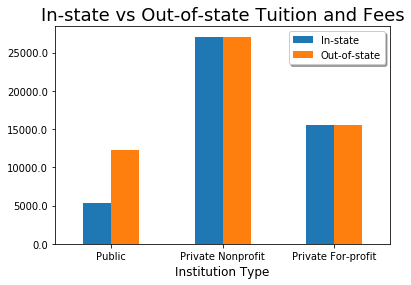

In [181]:
# compare in-state vs out-of-state tuition and fees across the three different school types
df_barplot = df_return.groupby('CONTROL', as_index=True)['TUITIONFEE_IN', 'TUITIONFEE_OUT'].mean()
ax = df_barplot.plot.bar()
ax.set_xlabel('Institution Type', fontsize=12)
ax.set_title('In-state vs Out-of-state Tuition and Fees', fontsize=18)
ax.set_yticklabels(np.linspace(0, 25000, num=6), fontsize=10)
ax.set_xticklabels(['Public', 'Private Nonprofit', 'Private For-profit'], rotation=0, fontsize=10)
legend = ax.legend(labels=['In-state', 'Out-of-state'], loc='upper right', fontsize=10, fancybox=True, shadow=True)
plt.show()

The barplot above shows us predictable but still interesting differences between private and public universities. Pubic schools are on average cheaper than both types of private schools even for out-of-state students. The plot also shows us that attending the local public school is the cheapest route to higher education. Lastly, we can see that while being cheaper than private non-profit schools, private for-profit schools are more expensive than public schools and both for profit schools do not differentiate between in-state or out-of-state students when it comes to tuition. 

#### Cost of Attendance vs. Faculty Salary

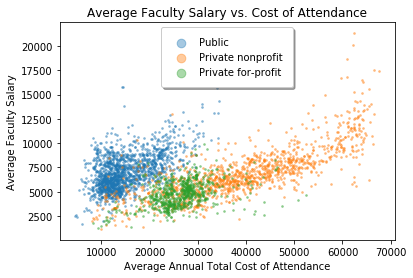

In [182]:
# average cost of attendance vs. average faculty salary
fig, ax = plt.subplots()
for c, df in df_return.groupby('CONTROL'):
    ax.scatter(df['COSTT4_A'], df['AVGFACSAL'], label=c, alpha=0.4, s=3)
ax.legend()
ax.legend(fancybox=True, shadow=True, markerscale=5, borderpad=1)
ax.set_title('Average Faculty Salary vs. Cost of Attendance')
ax.set_xlabel('Average Annual Total Cost of Attendance')
ax.set_ylabel('Average Faculty Salary')
plt.show()

In [183]:
df_return.groupby(by='CONTROL').mean()

,COSTT4_A,MD_EARN_WNE_P10,AVGFACSAL,TUITIONFEE_IN,TUITIONFEE_OUT,PREDDEG
CONTROL,,,,,,
Public,15259.083388,34281.824104,7087.871010,5381.465798,12243.844300,2.194137
Private nonprofit,38690.660862,40429.601990,6873.521559,27049.956882,27065.636816,2.812604
Private for-profit,26456.920502,31735.843794,4789.291492,15553.814505,15560.341702,2.022315


Next, we can use a scatter plot to better see the differences in the distribution of average faculty salaries in the institutions. The y-axis is the average faculty salary, and on the x-axis is the annual total cost of attendance. Using the table of means, we can see that public school do offer on average better salaries. But the plot complicates that picture by showing us that while public schools consistently offer competative salaries, some of the most elite schools in the country have higher average salaries. It is important to note that public schools remain competative even at higher tuition prices. Lastly, there seems to be no difference in how much private nonprofit vs for-profit school pay their faculty.

## Analysis: College Accessibility

### *Guiding Question: Is college accessible to students from low- and middle-income households?*

Our answer to this question involved several different variables and the creation of two new ones. Our team looked at the question of accessibility through an economic lens, focusing on the relationship between college debt and ten year income after graduation. As a result, our guiding question can be also interpreted to mean: *Given the high cost of attendance, is college an affordable investment for low- and middle-income households?* Before we try to answer this question, we'll first have a discussion about the variables we used.

**Definitions**  
- *low-income households*: households whose family income is **\$30,000 or less**.  
- *middle-income households*: households whose family income is between **\$30,001-\$75,000**.


**Variable Selection**  
- *'STABBR'*: state abbreviations (for a later analysis comparing accessibility by state)
- '*MD_EARN_WNE_P10'*: median income for all students receiving federal aid, per institution. This number was measured 10 years after graduation.
- *'DEBT_MDN'*: median loan debt accumulated at the instutution by student borrowers of federal loans
- *'MD_INC_DEBT_MDN'*: median loan debt accumulated at the institution for stduents from middle-income households
- *'LO_INC_DEBT_MDN'*: median loan debt accumulated at the institution for stduents from low-income households
- *'HIGHDEG'*: highest award level conferred at the institution
- *'PREDDEG'*: type of award that the institution primarily confers. An institution like UCLA, for example, primarily confers Bachelor's Degrees, though it's also possible to also earn graduate degrees from this school. 
- *'CONTROL'*: indicates a public, private nonprofit, or public for-profit institution
- *'HCM2'*: boolean indicating schools participating in a Heightened Cash Montoring (HCM) payment method
- *'LO_INC_DEBT_RATIO'*: new variable defined as $\frac{median \space debt \space owed \space by \space low-income \space students}{median \space debt \space for\space all\space students}$ per institution
- *'MD_INC_DEBT_RATIO'*: new variable defined as $\frac{median \space debt \space owed \space by \space middle-income \space students}{median \space debt \space for\space all\space students}$ per institution

**Note**: The nature of our data means that we're *only examining those students who receive Title IV aid*. Therefore, any insight gleaned from this analysis is not meant to represent an institution's whole student body, as not every student qualifies or utilizes this type of aid.

#### Comparing Median Earnings and Low-Income Students' Median Debt

In [117]:
# import packages, load data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.plotly as py
import plotly.graph_objs as go

df = pd.read_csv('~/Documents/Stats 131/Most-Recent-Cohorts-All-Data-Elements.csv')

# create subset containing variables of interest
cols = [ "STABBR","MD_EARN_WNE_P10", "MD_INC_DEBT_MDN", "LO_INC_DEBT_MDN", "HIGHDEG","DEBT_MDN", "CONTROL","PREDDEG", "HCM2"]

# drop 'PrivacySuppressed' and NA values
income = df[cols]
income = income[~income.isin(['PrivacySuppressed'])]
income = income.dropna()

# only include schools participating in HCM payment method
income = income.drop(income.loc[income["HCM2"] == 1,:].index)

# class change strings into numeric
income[cols[1:]] = income[cols[1:]].astype(float)

# rename variable values
income["HIGHDEG"] = income["HIGHDEG"].replace({0:"Non-degree-granting",
      1:"Certificate",
      2:"Associate's Degree",
      3:"Bachelor's Degree",
      4:"Graduate Degree"})

income["CONTROL"] = income["CONTROL"].replace({1:"Public",
      2:"Private nonprofit ",
      3:"Private for-profit"})

income["PREDDEG"] = income["PREDDEG"].replace({0:"Not classified",
      1:"Predominantly certificate-granting",
      2:"Predominantly associate's degree-granting",
      3:"Predominantly bachelor's degree-granting",
      4:"Entirely graduate degree-granting"})

# exclude graduate schools and PREDDEG-unclassified schools
income = income[~income['PREDDEG'].isin(["Not classified", "Entirely graduate degree-granting"])]

# set plot preferences 
kwargs = dict( data = income, scatter_kws={"alpha":0.3}, ci = False, fit_reg = False)

/Users/a1daylanan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning:

Columns (6,9,1608,1619,1620,1621,1622,1623,1624,1625,1626,1627,1628,1629,1688,1689,1690,1691,1692,1703,1704,1725,1726,1727,1728,1729,1743,1815,1816,1817,1818,1823,1824) have mixed types. Specify dtype option on import or set low_memory=False.



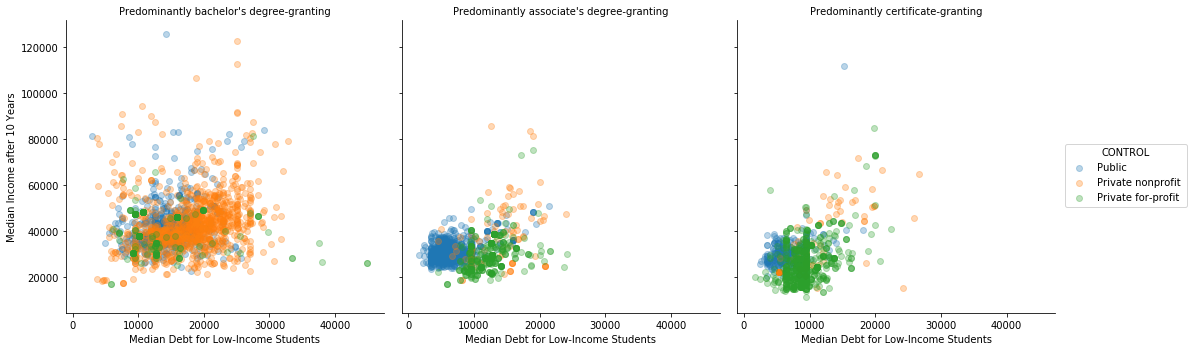

In [193]:
g = sns.lmplot(x = "LO_INC_DEBT_MDN", y = "MD_EARN_WNE_P10", **kwargs, hue = "CONTROL", col = "PREDDEG", col_wrap = 3)
g = (g.set_axis_labels("Median Debt for Low-Income Students", "Median Income after 10 Years"),
     g.set_titles("{col_name}"))
plt.show()

**Commentary**  
The plot above shows that schools that primarily grant Bachelor's Degrees are the most represented in the dataset (entirely graduate degree-granting schools and unclassified schools were scant and removed from analysis). This group also has the greatest variation in terms of the median debt for low-income students and the median earnings for low-income students. For schools that offer Associates Degrees and Certificates, students tend to earn less after 10 years, though students from these schools also tend to find themselves with less debt. Schools that offer Certificates have a lot more variation in terms of median income than schools that offer Associate's Degrees.   
Color-coding by institution type also tells us that most private nonprofit schools are those that primarily award Bachelor's Degrees. There's a high concentration of private for-profit schools that predominantly offer Certificates. 

#### Comparing Median Earnings and Middle-Income Students' Median Debt

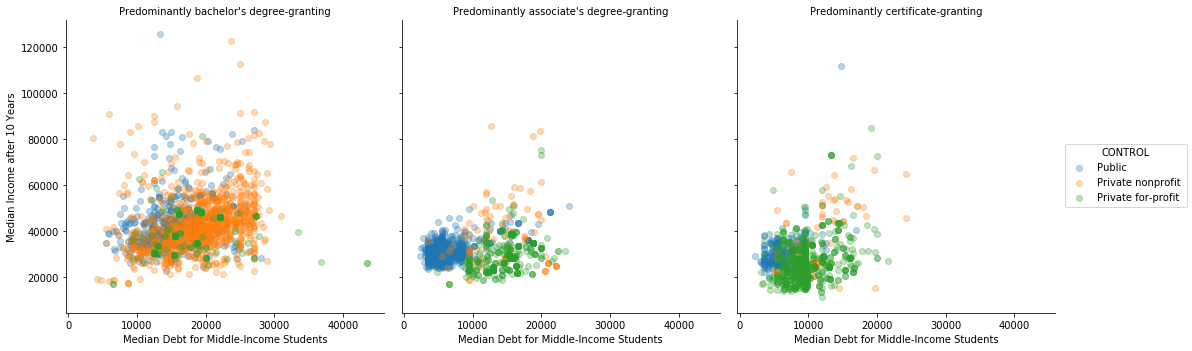

In [112]:
g = sns.lmplot(x = "MD_INC_DEBT_MDN", y = "MD_EARN_WNE_P10", **kwargs, hue = "CONTROL", col = "PREDDEG", col_wrap = 3)
g = (g.set_axis_labels("Median Debt for Middle-Income Students", "Median Income after 10 Years"),
     g.set_titles("{col_name}"))
plt.show()

**Commentary**  
The trends surrounding median debt and median income are about the same for middle-income students. There is still a lot of variation in the x- and y-axes for institutions that primarily award Bachelor's Degrees, with median debt and median income looking, on average, higher than those reported by Associate's Degree-awarding and Certificate-degree awarding schools.  
Anecdotal evidence seems to confirm the trends we've seen so far: Bachelor's programs, which typically take four years to complete, tend to cost more than programs like Associate's programs that are typically only two years. 

#### Examining Debt Ratios for Low-Income Students

*Do low- and middle-income students find themselves more in debt than the average student receiving federal aid?*   

We examined this question by comparing the median debt for these two groups against the median debt for all students. If the ratio = 1, that means that low- or middle-income students at a university often find themselves paying just as much in federal loans as students from other income classifications. Ratios lower than 1 mean that low- or middle-income students are less in debt than students from other income classifications.  

In [121]:
# create new debt ratio variables for low- and middle-income students 
income["LO_INC_DEBT_RATIO"] = income["LO_INC_DEBT_MDN"]/income["DEBT_MDN"]
income["MD_INC_DEBT_RATIO"] = income["MD_INC_DEBT_MDN"]/income["DEBT_MDN"]

In [123]:
income.loc[:,["LO_INC_DEBT_RATIO","CONTROL","PREDDEG","MD_EARN_WNE_P10"]].groupby(["CONTROL", "PREDDEG"]).mean()

LO_INC_DEBT_RATIO  \
CONTROL            PREDDEG                                                        
Private for-profit Predominantly associate's degree-granting           0.973595   
                   Predominantly bachelor's degree-granting            0.913507   
                   Predominantly certificate-granting                  0.992714   
Private nonprofit  Predominantly associate's degree-granting           1.045824   
                   Predominantly bachelor's degree-granting            0.987277   
                   Predominantly certificate-granting                  1.042654   
Public             Predominantly associate's degree-granting           1.030032   
                   Predominantly bachelor's degree-granting            0.994350   
                   Predominantly certificate-granting                  1.051489   

                                                              MD_EARN_WNE_P10  
CONTROL            PREDDEG                                                     
Private for-profit Predominantly associate's degree-granting     31809.247312  
                   Predominantly bachelor's degree-granting      39951.690821  
                   Predominantly certificate-granting            25181.705948  
Private nonprofit  Predominantly associate's degree-granting     37653.684211  
                   Predominantly bachelor's degree-granting      43113.114754  
                   Predominantly certificate-granting            31992.436975  
Public             Predominantly associate's degree-granting     31605.737705  
                   Predominantly bachelor's degree-granting      42771.808511  
                   Predominantly certificate-granting            30688.559322

$debt \space ratio = \frac{median \space debt \space owed \space by \space low-income \space students}{median \space debt \space for\space all\space students}$ 

- Ratios calculated per institution

**Commentary**  
The table above is a summary of the debt ratios per institution type and predominant award granted. The only institution type in which low-income students pay less in loans than other students are private for-profit institutions, indicated by debt ratios lower than 1. Any ratio lower than one is still fairly high, however, which means that low-income students are still roughly as much in debt as any other student taking out loans.   

We see a greater variation in the last column, which is median income after 10 years (on average, aggregated by institution type and predominant degree awarded). Private for-profit institutions have the lowest median earnings at \$25,181 while private nonprofit schools have the highest median at \$43113.  

Of private nonprofit schools and public schools, those private schools that are predominantly award Bachelor's Degrees (and, as we examined earlier, have graduates with the highest median income) have the *lowest* debt ratio for low-income students. That is, low-income students who attend these universities, on average, have less student debt than the rest of the aid-receiving student body while being part of a student body that earns the *higest* median income, on average.   

Public schools who also predominantly award Bachelor's Degrees follow a similar trend of (relatively) lower debt with high median income after ten years.

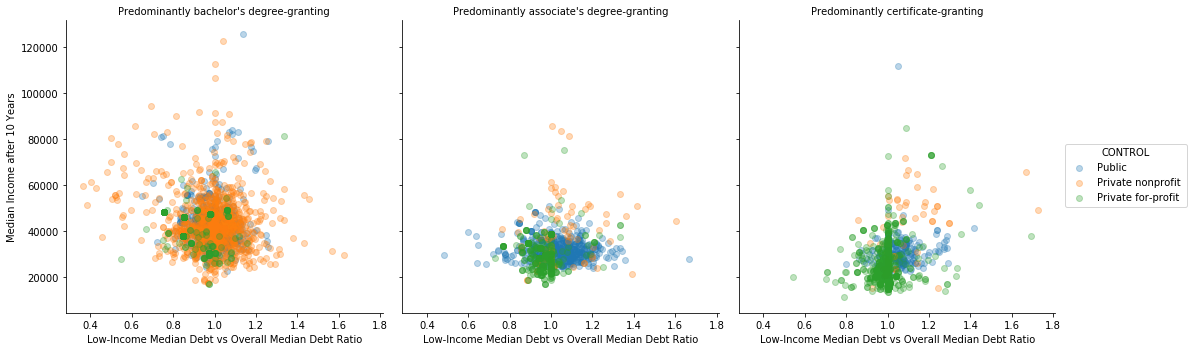

In [131]:
g = sns.lmplot(x = "LO_INC_DEBT_RATIO", y = "MD_EARN_WNE_P10", **kwargs, hue = "CONTROL", col = "PREDDEG", col_wrap = 3)
g = (g.set_axis_labels("Low-Income Median Debt vs Overall Median Debt Ratio","Median Income after 10 Years"),
     g.set_titles("{col_name}"))
plt.show()

**Commentary**  
The plots above are a graphical representation of the table examined earlier, though these scatterplots shed more light on the variation within these groups. Like the scatterplots from before, a lot of variation exists within the ratio and the median income for schools that predominantly award Bachelor's Degrees. Within this group, the most variation exists for private nonprofit schools. There are some on the far left of the graph that show how their low-income students owe way less in student loans than the rest of the student body. Those private nonprofit schools on the far right are the exact opposite -- their low-income students find themsevles more in debt after graduation than the average student who take out loans.   

For schools that award Associate's Degrees, there's a high concentration of public schools with low-income students who find themsevles more in debt than the average student who takes out loans. 

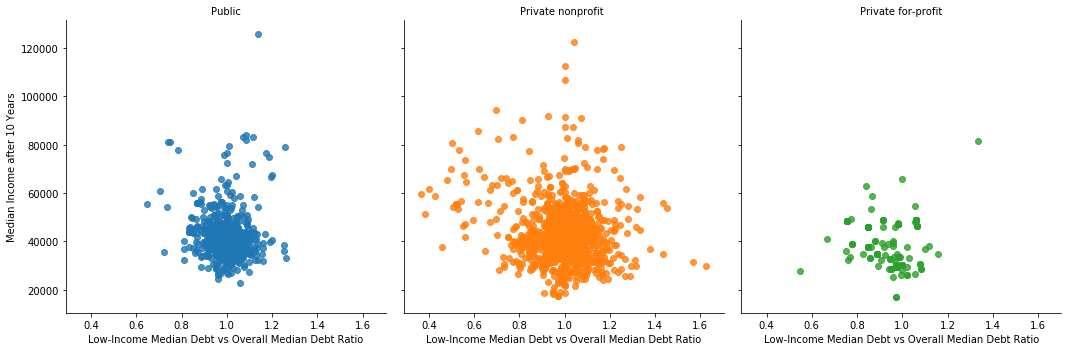

In [136]:
g = sns.lmplot(data = income[income["PREDDEG"] == "Predominantly bachelor's degree-granting"], 
               x = "LO_INC_DEBT_RATIO", y = "MD_EARN_WNE_P10",
               hue = "CONTROL", col = "CONTROL", col_wrap = 3, ci = False, fit_reg = False)
g = (g.set_axis_labels("Low-Income Median Debt vs Overall Median Debt Ratio","Median Income after 10 Years"),
     g.set_titles("{col_name}"))
plt.show()

**Commentary**  
The plots above examine only those schoools that predominantly award Bachelor's Degrees. Here, we see the same variation in private nonprofit schools that we saw before. There's less variation in public schools in both the x- and y-axes (exluding outliers); the ratio hovers around 0.99, like we saw above, while earning an (average) median salary comparable to private nonprofit schools. There are fewer schools in the highest median income brackets for public schools than there are for private nonprofit schools. Private for-profit schools have some variation in the x-axis, though there are too few observations to draw any meaningful conclusions.

#### Examining Debt Ratios for Middle-Income Students

In [150]:
income.loc[:,["MD_INC_DEBT_RATIO","CONTROL","PREDDEG", "MD_EARN_WNE_P10"]].groupby(["CONTROL", "PREDDEG"]).mean()

MD_INC_DEBT_RATIO  \
CONTROL            PREDDEG                                                        
Private for-profit Predominantly associate's degree-granting           1.173013   
                   Predominantly bachelor's degree-granting            1.244321   
                   Predominantly certificate-granting                  1.043245   
Private nonprofit  Predominantly associate's degree-granting           1.078792   
                   Predominantly bachelor's degree-granting            1.049962   
                   Predominantly certificate-granting                  1.044783   
Public             Predominantly associate's degree-granting           0.983126   
                   Predominantly bachelor's degree-granting            1.031960   
                   Predominantly certificate-granting                  0.972661   

                                                              MD_EARN_WNE_P10  
CONTROL            PREDDEG                                                     
Private for-profit Predominantly associate's degree-granting     31809.247312  
                   Predominantly bachelor's degree-granting      39951.690821  
                   Predominantly certificate-granting            25181.705948  
Private nonprofit  Predominantly associate's degree-granting     37653.684211  
                   Predominantly bachelor's degree-granting      43113.114754  
                   Predominantly certificate-granting            31992.436975  
Public             Predominantly associate's degree-granting     31605.737705  
                   Predominantly bachelor's degree-granting      42771.808511  
                   Predominantly certificate-granting            30688.559322

**Commentary**  
Conducting the same analyses as we did earlier, but this time for students from middle-income brackets, we see that the trends are nearly reversed. Schools that predominantly award Bachelor's Degrees all have students from middle-income brackets in more debt than the average student who takes out loans. The only schools in which middle-income students tend to owe less in debt than the average student are public instutitions that award Associates Degrees or Certificates.  

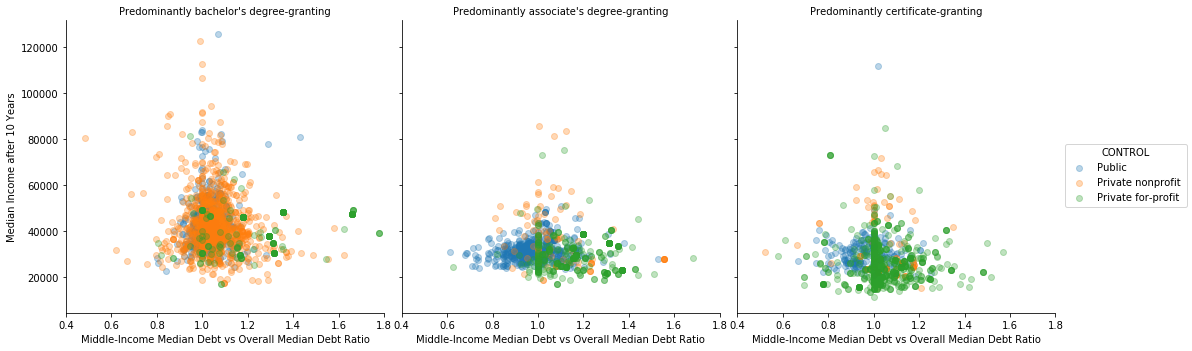

In [159]:
g = sns.lmplot(x = "MD_INC_DEBT_RATIO", y = "MD_EARN_WNE_P10", **kwargs, hue = "CONTROL", col = "PREDDEG", col_wrap = 3)
axes = g.axes
g = (g.set_axis_labels("Middle-Income Median Debt vs Overall Median Debt Ratio","Median Income after 10 Years"),
     g.set_titles("{col_name}"))
axes[0,].set_xlim(0.4,1.8)
axes[1,].set_xlim(0.4,1.8)
axes[2,].set_xlim(0.4,1.8)
plt.show()

**Commentary**  
Though the values reported in the table suggest a difference in financial aid for low- and middle-income students, the scatterplots above (reporting on middle-income students) are very similar to the plots from before. We still see variation in the x- and y-axes for predominantly Bachelor's Degree-awarding schools, though the ratio is shifted slightly to the right.   
A more dramatic difference is found in the plots representing predominantly Associate's Degree-awarding schools. The concentration of public and private for-profit schools is flipped between income brackets. That is, public schools have low-income students paying a greater share of school debt, while private for-profit schools have middle-income students paying a greater share of school debt. The reverse of these scenarios also generally holds true. 

**Note**: The axes were modified for this plot, along with the one below, to account for a public school outlier that shifted the x-axis an unreasonable amount to the right.

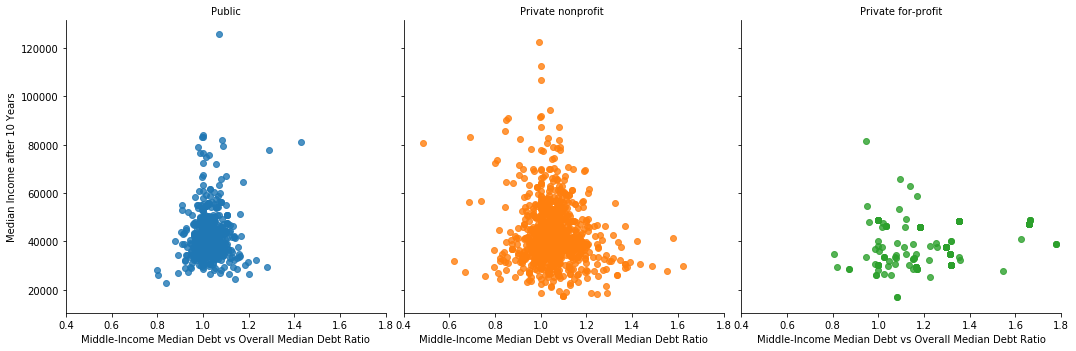

In [160]:
g = sns.lmplot(data = income[income["PREDDEG"] == "Predominantly bachelor's degree-granting"], 
               x = "MD_INC_DEBT_RATIO", y = "MD_EARN_WNE_P10",
               hue = "CONTROL", col = "CONTROL", col_wrap = 3, ci = False, fit_reg = False)
axes = g.axes
g = (g.set_axis_labels("Middle-Income Median Debt vs Overall Median Debt Ratio","Median Income after 10 Years"),
     g.set_titles("{col_name}"))
axes[0,].set_xlim(0.4,1.8)
axes[1,].set_xlim(0.4,1.8)
axes[2,].set_xlim(0.4,1.8)
plt.show()

**Commentary**  
Taking a closer look at schools that primarily award Bachelor's Degrees shows us the same patterns for middle-income students that we saw with low-income students. The greatest variation in both the x- and y-directions is within private nonprofit schools, while public schools remain fairly consistent in median income after ten years and even more so in regarding the debt ratio. Data on private for-profit schools remains sparse.  

## Analysis: Geographic Location

### *Guiding Question: How do college costs compare across the country?*

To answer this question, we examined the variables *NPT4_PUB* and *NPT4_PRIV*, two integer variables that describe the average net price of attending public and private univeristies, respectively. This variable does not differentiate between for-profit and nonprofit private schools.

**What is average net price?**  
Average net price, as defined by in the College Scorecard dataset, is the full cost of attendance (including tuition and fees; books and supplies; living expenses) minus aid (federal aid, state aid, institutional grant/scholarship) for *full-time, first-time undergraduate Title IV-receiving students.*   
That means that the statistics represented in this column apply only to a) undergraduates who b) are full-time students and c) receiving federal aid.  

Part of the motivation for this question came from curiosity about whether some states are more expensive to live in than others. We were particularly interested in the *NPT4_PUB* and *NPT4_PRIV* variables because they contain some of the exact costs that we hypothesized were different among states: living expenses.  

We decided to aggregate the average cost of public schools (with another map for private schools) per state. Because we used the average, we thought it would be important to first point out the distribution of schools per state, as some states have way more schools than others (which therefore affects the weight of each school on the mean).

#### Number of Schools per State

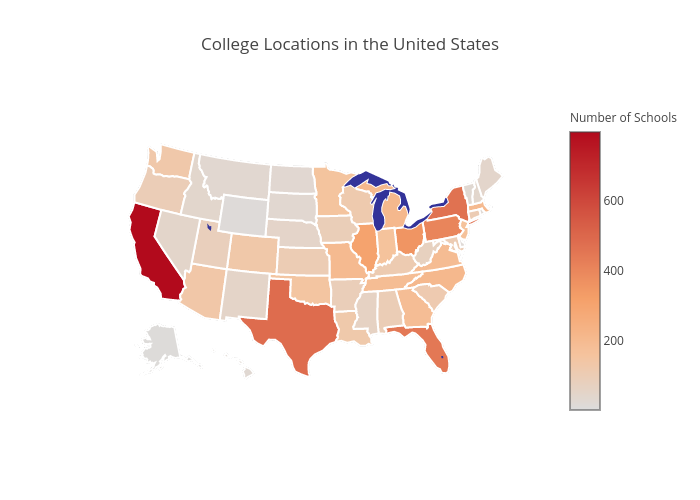

In [184]:
# load data
df = pd.read_csv('~/Documents/Stats 131/Most-Recent-Cohorts-All-Data-Elements.csv', low_memory=False)

# subset data by variables of interest
cols=['STABBR', 'PREDDEG', 'CONTROL']
df_map = df_b[cols]

# count number of universities per state
d = {'state' : df_map['STABBR'].value_counts().index.tolist(), 'num_colleges' : df_map['STABBR'].value_counts().tolist()}
df_counts = pd.DataFrame(data = d)

# set map parameters
data = [ dict(
        type='choropleth',
        colorscale = 'Reds',
        autocolorscale = True,
        locations = df_counts['state'],
        z = df_counts['num_colleges'].astype(float),
        locationmode = 'USA-states',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Number of Schools")
        ) ]


layout = dict(
    title = 'College Locations in the United States',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(51, 51, 153)'),
             )
    
fig = dict( data=data, layout=layout )

py.image.ishow(fig)

**Commentary**  
The map above shows us that the distribution of colleges (both public and private) are not the same across all states. California has the highest number of colleges, followed by Texas and New York. There's a noticeable disparity between college counts in the Western half of the US. Though California has the highest number of universities, there are other states in the West like Idaho, Montana and Wyoming that have fewer than five universities represented in the dataset. These states have been excluded in the following analyses in the interest of school weights in the average.

#### Average Net Price - Public Institutions

In [185]:
cols=['STABBR', 'NPT4_PUB', 'PREDDEG', 'CONTROL']
df_map = df_b[cols]

# grab all state names
states = df_map['STABBR'].value_counts().index.tolist()

# grab the (1) public, (2) predominantly bachelors awarding inst.
df_map = df_map[(df_map['CONTROL'] == 1) & (df_map['PREDDEG'] == 3)].dropna()

# identify those states with at least 5 public schools 
gt_five = sum(df_map['STABBR'].value_counts() > 5)
gt_five_states = df_map['STABBR'].value_counts().index.tolist()[:gt_five]

# find the average out of pocket tuition for each state 
df_map_summary = df_map.groupby(['STABBR'], as_index=False)['NPT4_PUB'].mean()

# disqualify schools with less than 5 public schools
df_map_summary['NPT4_PUB'][~df_map_summary['STABBR'].isin(gt_five_states)] = 0

# (optional) check most expensive/least expensive states 
#df_map_summary.sort_values(by='NPT4_PUB', ascending=False).head()
#df_map_summary.sort_values(by='NPT4_PUB', ascending=False).tail()

/Users/a1daylanan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



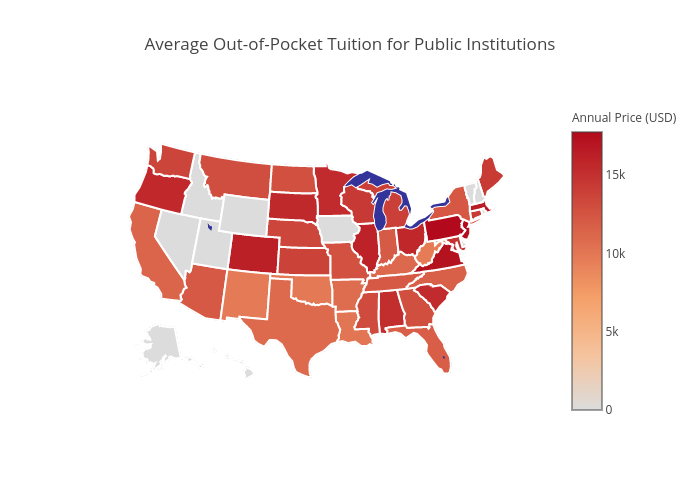

In [186]:
# set map parameters
data = [ dict(
        type='choropleth',
        colorscale = 'Reds',
        autocolorscale = False,
        locations = df_map_summary['STABBR'],
        z = df_map_summary['NPT4_PUB'].astype(float),
        locationmode = 'USA-states',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Annual Price (USD)")
        ) ]


layout = dict(
    title = 'Average Out-of-Pocket Tuition for Public Institutions',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(51, 51, 153)'),
             )
    
fig = dict( data=data, layout=layout )

py.image.ishow(fig)

**Data Wrangling Notes**  
The dataset presented in the plot above has the following attributes: 
- includes only public schools 
- includes states with at least five public schools recorded in the dataset 
- includes only institutions that predominantly award Bachelor's Degrees


**Commentary**  
The plot above shows that the cost of going to a public university is still, on average, thousands of dollars despite Title IV aid. We called this surplus cost the **out-of-pocket tuition** because this represents the cost that families have to pay on their own, without federal, state, or institutional aid. We examined this variable because out-of-pocket cost is an important factor of college accessibility.  
We can see that the out-of-pocket tuition for public institutions hovers around the 10-20k (USD) range. The states with the highest prices are Pennsylvania, New Jersey and Virginia.  West Virgina, Louisiana and New Mexico have the lowest prices.  

#### Average Net Price - Private Institutions

In [187]:
cols=['STABBR', 'NPT4_PRIV', 'PREDDEG', 'CONTROL']
df_map = df_b[cols]

# grab all state names
states = df_map['STABBR'].value_counts().index.tolist()

# grab the (1) private, (2) predominantly bachelors awarding inst.
df_map = df_map[(df_map['CONTROL'] != 1) & (df_map['PREDDEG'] == 3)].dropna()

# identify those states with at least 5 private schools 
gt_five = sum(df_map['STABBR'].value_counts() > 5)
gt_five_states = df_map['STABBR'].value_counts().index.tolist()[:gt_five]

# find the average out of pocket tuition for each state 
df_map_summary = df_map.groupby(['STABBR'], as_index=False)['NPT4_PRIV'].mean()

# disqualify schools with less than 5 private schools
df_map_summary['NPT4_PRIV'][~df_map_summary['STABBR'].isin(gt_five_states)] = 0

# add another value for Wyoming (originally a missing value)
df_map_summary.loc[-1] = ['WY', 0]

# (optional) check most expensive/least expensive states 
#df_map_summary.sort_values(by='NPT4_PRIV', ascending=False).head()
#df_map_summary.sort_values(by='NPT4_PRIV', ascending=False).tail()

/Users/a1daylanan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



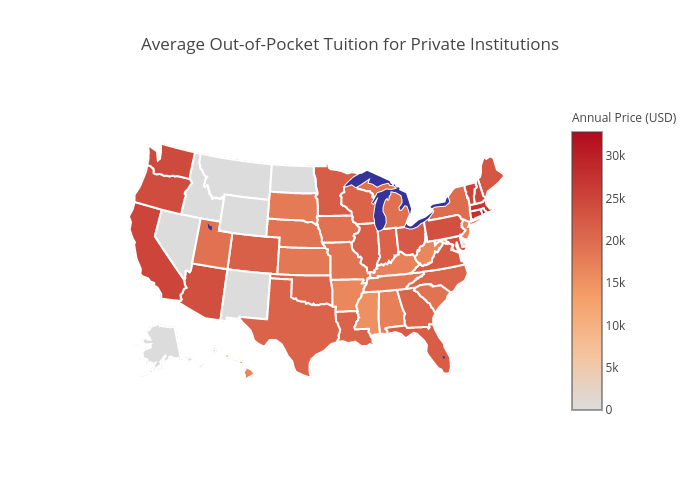

In [188]:
# set map parameters
data = [ dict(
        type='choropleth',
        colorscale = 'Reds',
        autocolorscale = False,
        locations = df_map_summary['STABBR'],
        z = df_map_summary['NPT4_PRIV'].astype(float),
        locationmode = 'USA-states',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Annual Price (USD)")
        ) ]


layout = dict(
    title = 'Average Out-of-Pocket Tuition for Private Institutions',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(51, 51, 153)'),
             )
    
fig = dict( data=data, layout=layout )

py.image.ishow(fig)

**Data Wrangling Notes**  
The dataset used in the plot above has the following attributes: 
- includes only private schools
- includes states with at least five public schools recorded in the dataset
- includes only institutions that predominantly award Bachelor's Degrees
    - includes an added 0 value for Wyoming, which did not have a private school that awarded primarily Bachelor's Degrees and showed up as NULL in the subset
    
**Commentary**  
The map above follows a similar trend to the map of public institutions that we saw before, though to a much more dramatic effect. Out-of-pocket cost remains above 10k (USD) annually. The price scale increased roughly two-fold to account for even higher out-of-pocket costs per state. At the top of the list for highest out-of-pocket costs are Rhode Island, Connecticut, and Massachusetts. California saw a dramatic increase in average out-of-pocket cost when accounting for private schools instead of public. West Virginia remains along the end of the price spectrum, along with Arkansas and Mississippi.

#### Comparing Debt Ratios by State - Low Income

Continuing with our accessibility analysis from earlier before, we took a look at how the share of debt by low-income students changes across states. 

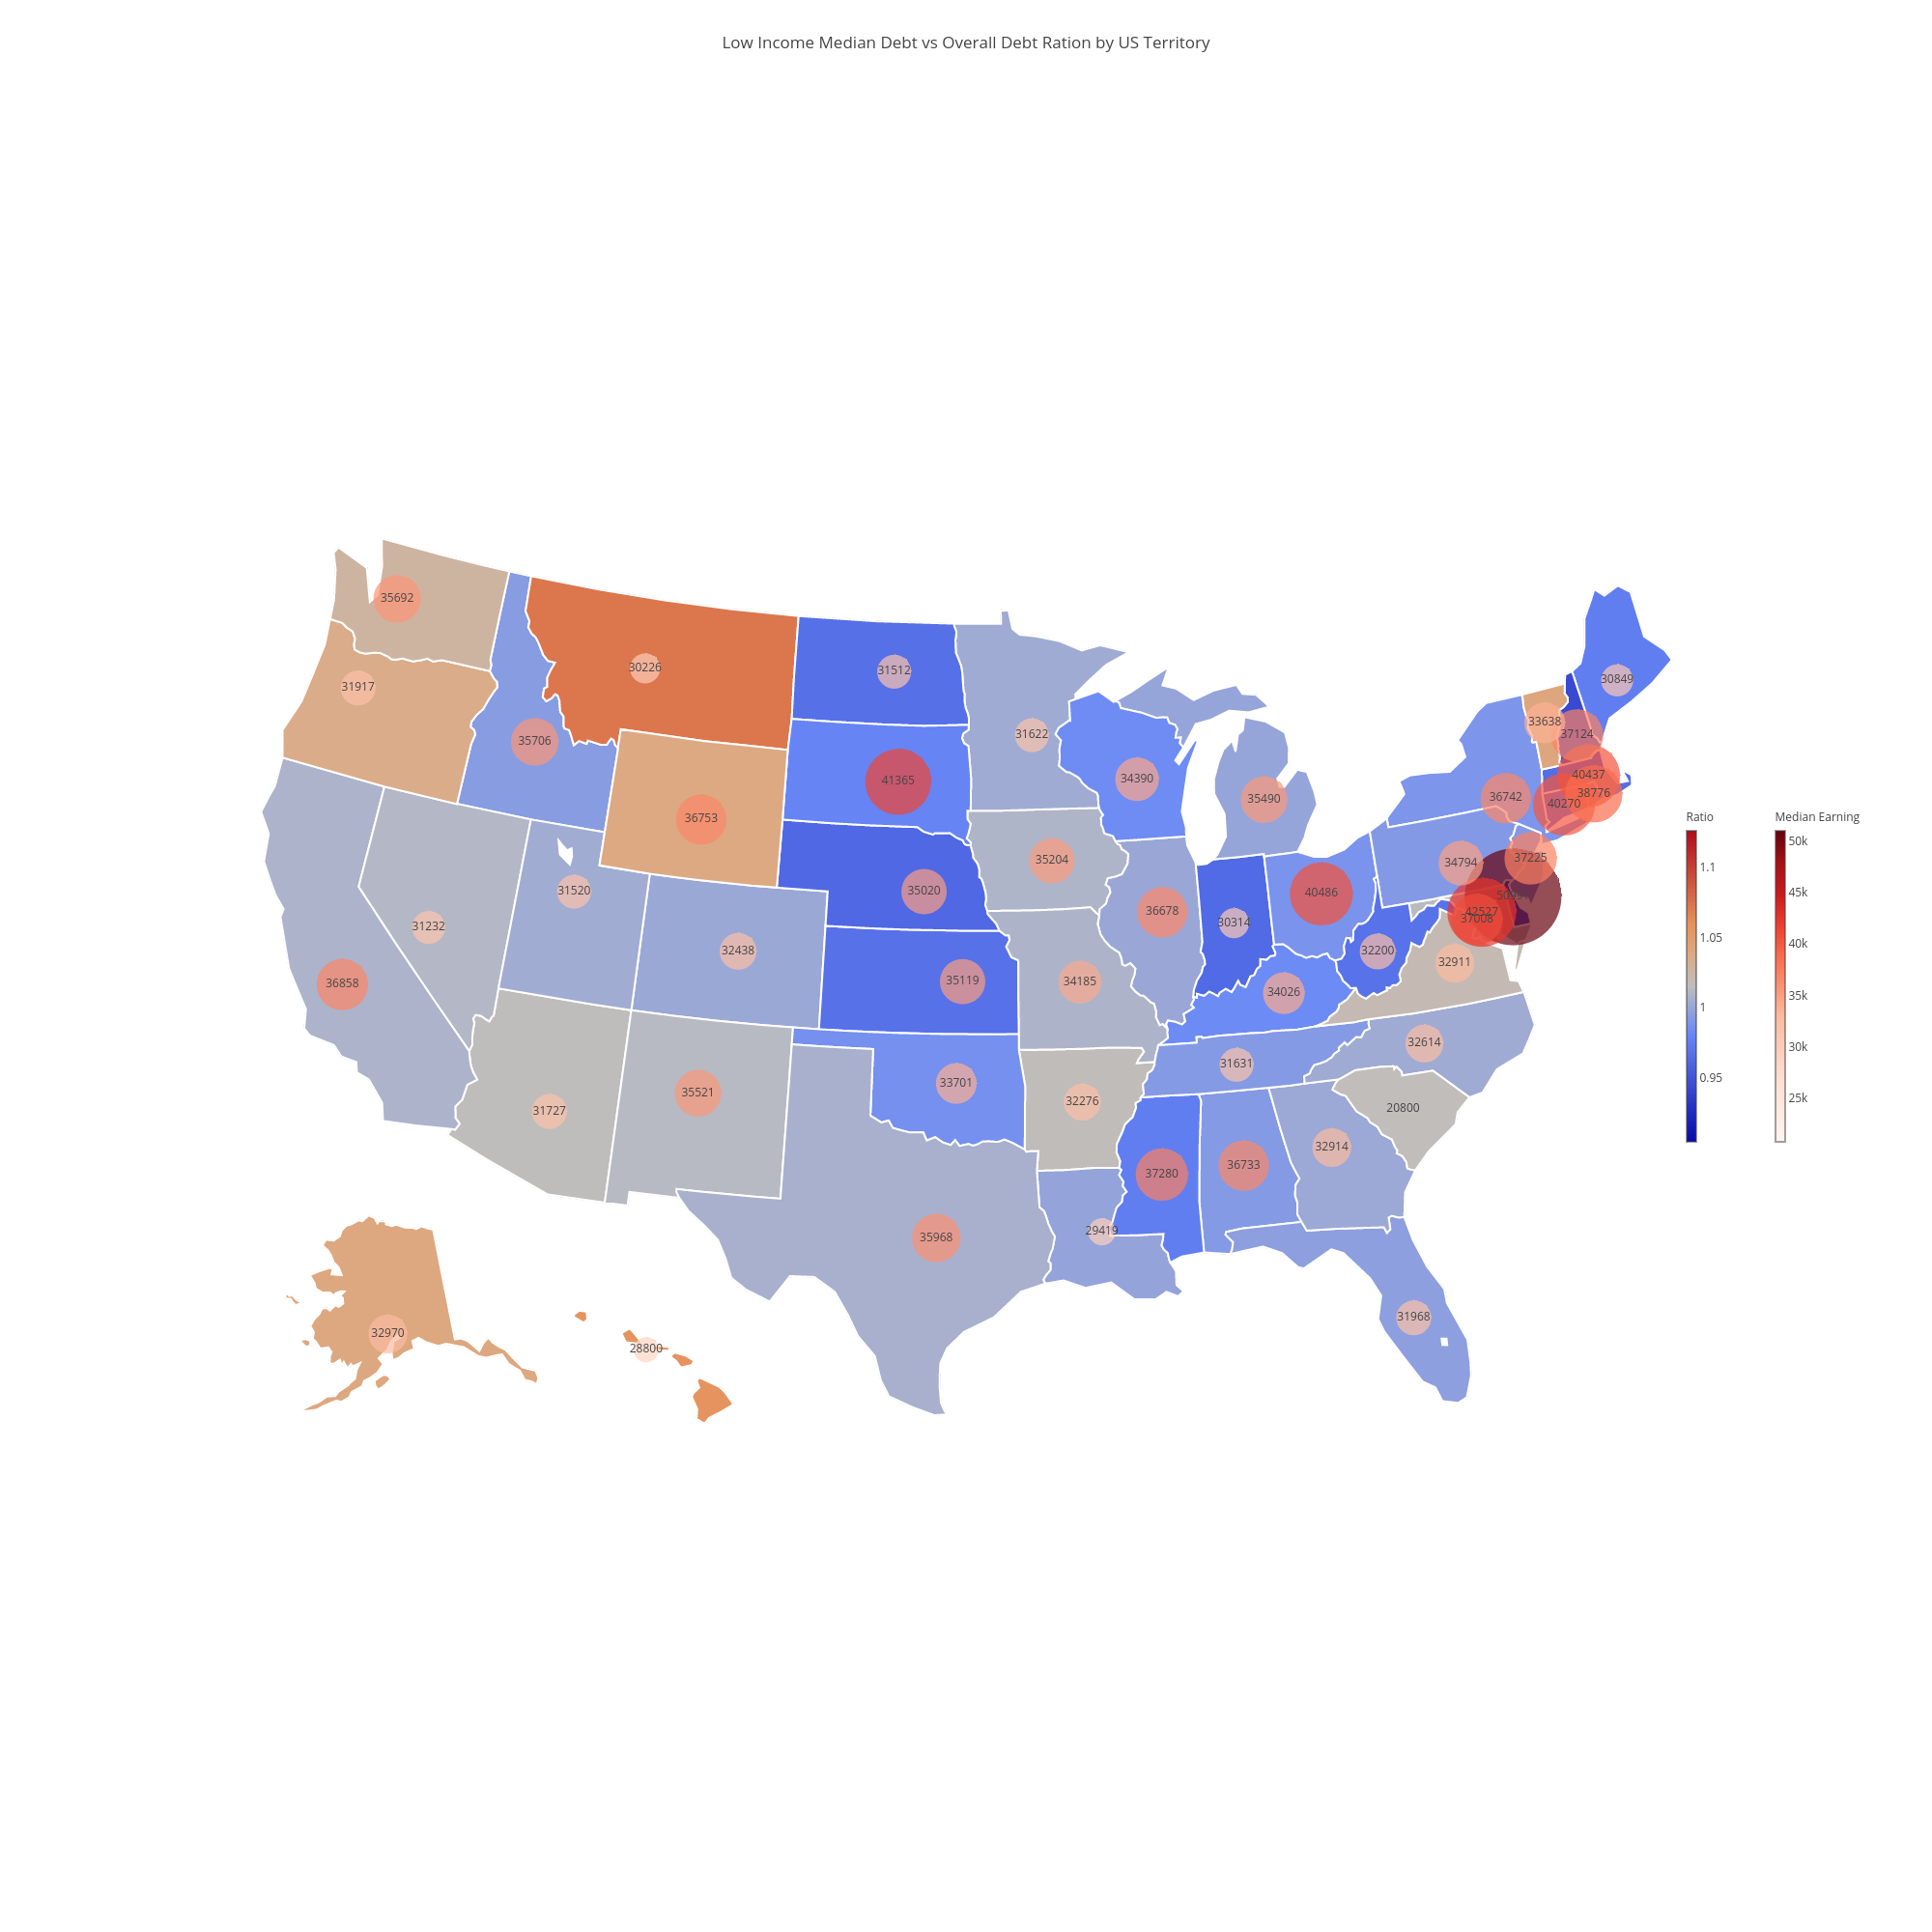

In [189]:
# load in location data
location = pd.read_csv('~/Documents/Stats 131/State.csv')

# group data by states and calculate mean by state
LO_MEAN = income.loc[:,["LO_INC_DEBT_RATIO","STABBR", "MD_EARN_WNE_P10"]].groupby("STABBR").mean().reset_index()

size = (LO_MEAN['MD_EARN_WNE_P10']- np.min(LO_MEAN['MD_EARN_WNE_P10']))/(np.max(LO_MEAN['MD_EARN_WNE_P10']) - np.min(LO_MEAN["MD_EARN_WNE_P10"]))*100
size = size.astype(int)

# set map parameters
scale = [[0, 'rgb(255,245,240)'], [0.2, 'rgb(254,224,210)'], [0.4, 'rgb(252,187,161)'], [0.5, 'rgb(252,146,114)'], [0.6, 'rgb(251,106,74)'], [0.7, 'rgb(239,59,44)'], [0.8, 'rgb(203,24,29)'], [0.9, 'rgb(165,15,21)'], [1, 'rgb(103,0,13)']]

map = [ go.Choropleth(
        type='choropleth',
        autocolorscale = False,
        locations = LO_MEAN['STABBR'],
        z = LO_MEAN["LO_INC_DEBT_RATIO"].astype(float),
        locationmode = 'USA-states',
        text = np.array(["Median Earning of studetns after 10 years: " + str(x) for x in LO_MEAN['MD_EARN_WNE_P10']]),
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Ratio",
            x = 0.9,
            thickness = 10,
            len = 0.2)
        ) ,
        go.Scattergeo(
                lon = location["Longitude"],
                lat = location["Latitude"],
                mode = "markers+text",
                text = np.array(LO_MEAN['MD_EARN_WNE_P10']).round(),
                marker = dict(
                        size = size,
                        line = dict(width = 0),
                        autocolorscale = False,
                        colorscale = scale,
                        color = LO_MEAN["MD_EARN_WNE_P10"],
                        cmin = LO_MEAN["MD_EARN_WNE_P10"].min(),
                        cmax = LO_MEAN["MD_EARN_WNE_P10"].max(),
                        colorbar = dict(
                            title = "Median Earning",
                            x = 0.95,
                            thickness = 10,
                            len = 0.2))
                )
        ]

layout = dict(
        title = 'Low Income Median Debt vs Overall Debt Ration by US Territory',
        autosize=False,
        width=2000,
        height=2000,
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )

fig = go.Figure(data = map, layout=layout)

py.image.ishow(fig)

**Commentary**  
Here, we're presenting the information about debt ratio vs. median income after ten years in an analysis across states. Another difference is that we're aggregating across institution types, so the schools represented are public, private nonprofit, and private for-profit collectively.  
Some general trends from the plot show that the East Coast is a great place for low-income students because of a generally low debt ratio (represented by states with blue tones) and a high (average) median income after ten years (represented by circle color and size).  
States in the West see low-income students paying as much, if not more, than other students who take out loans. 

#### Comparing Debt Ratios by State - Middle Income

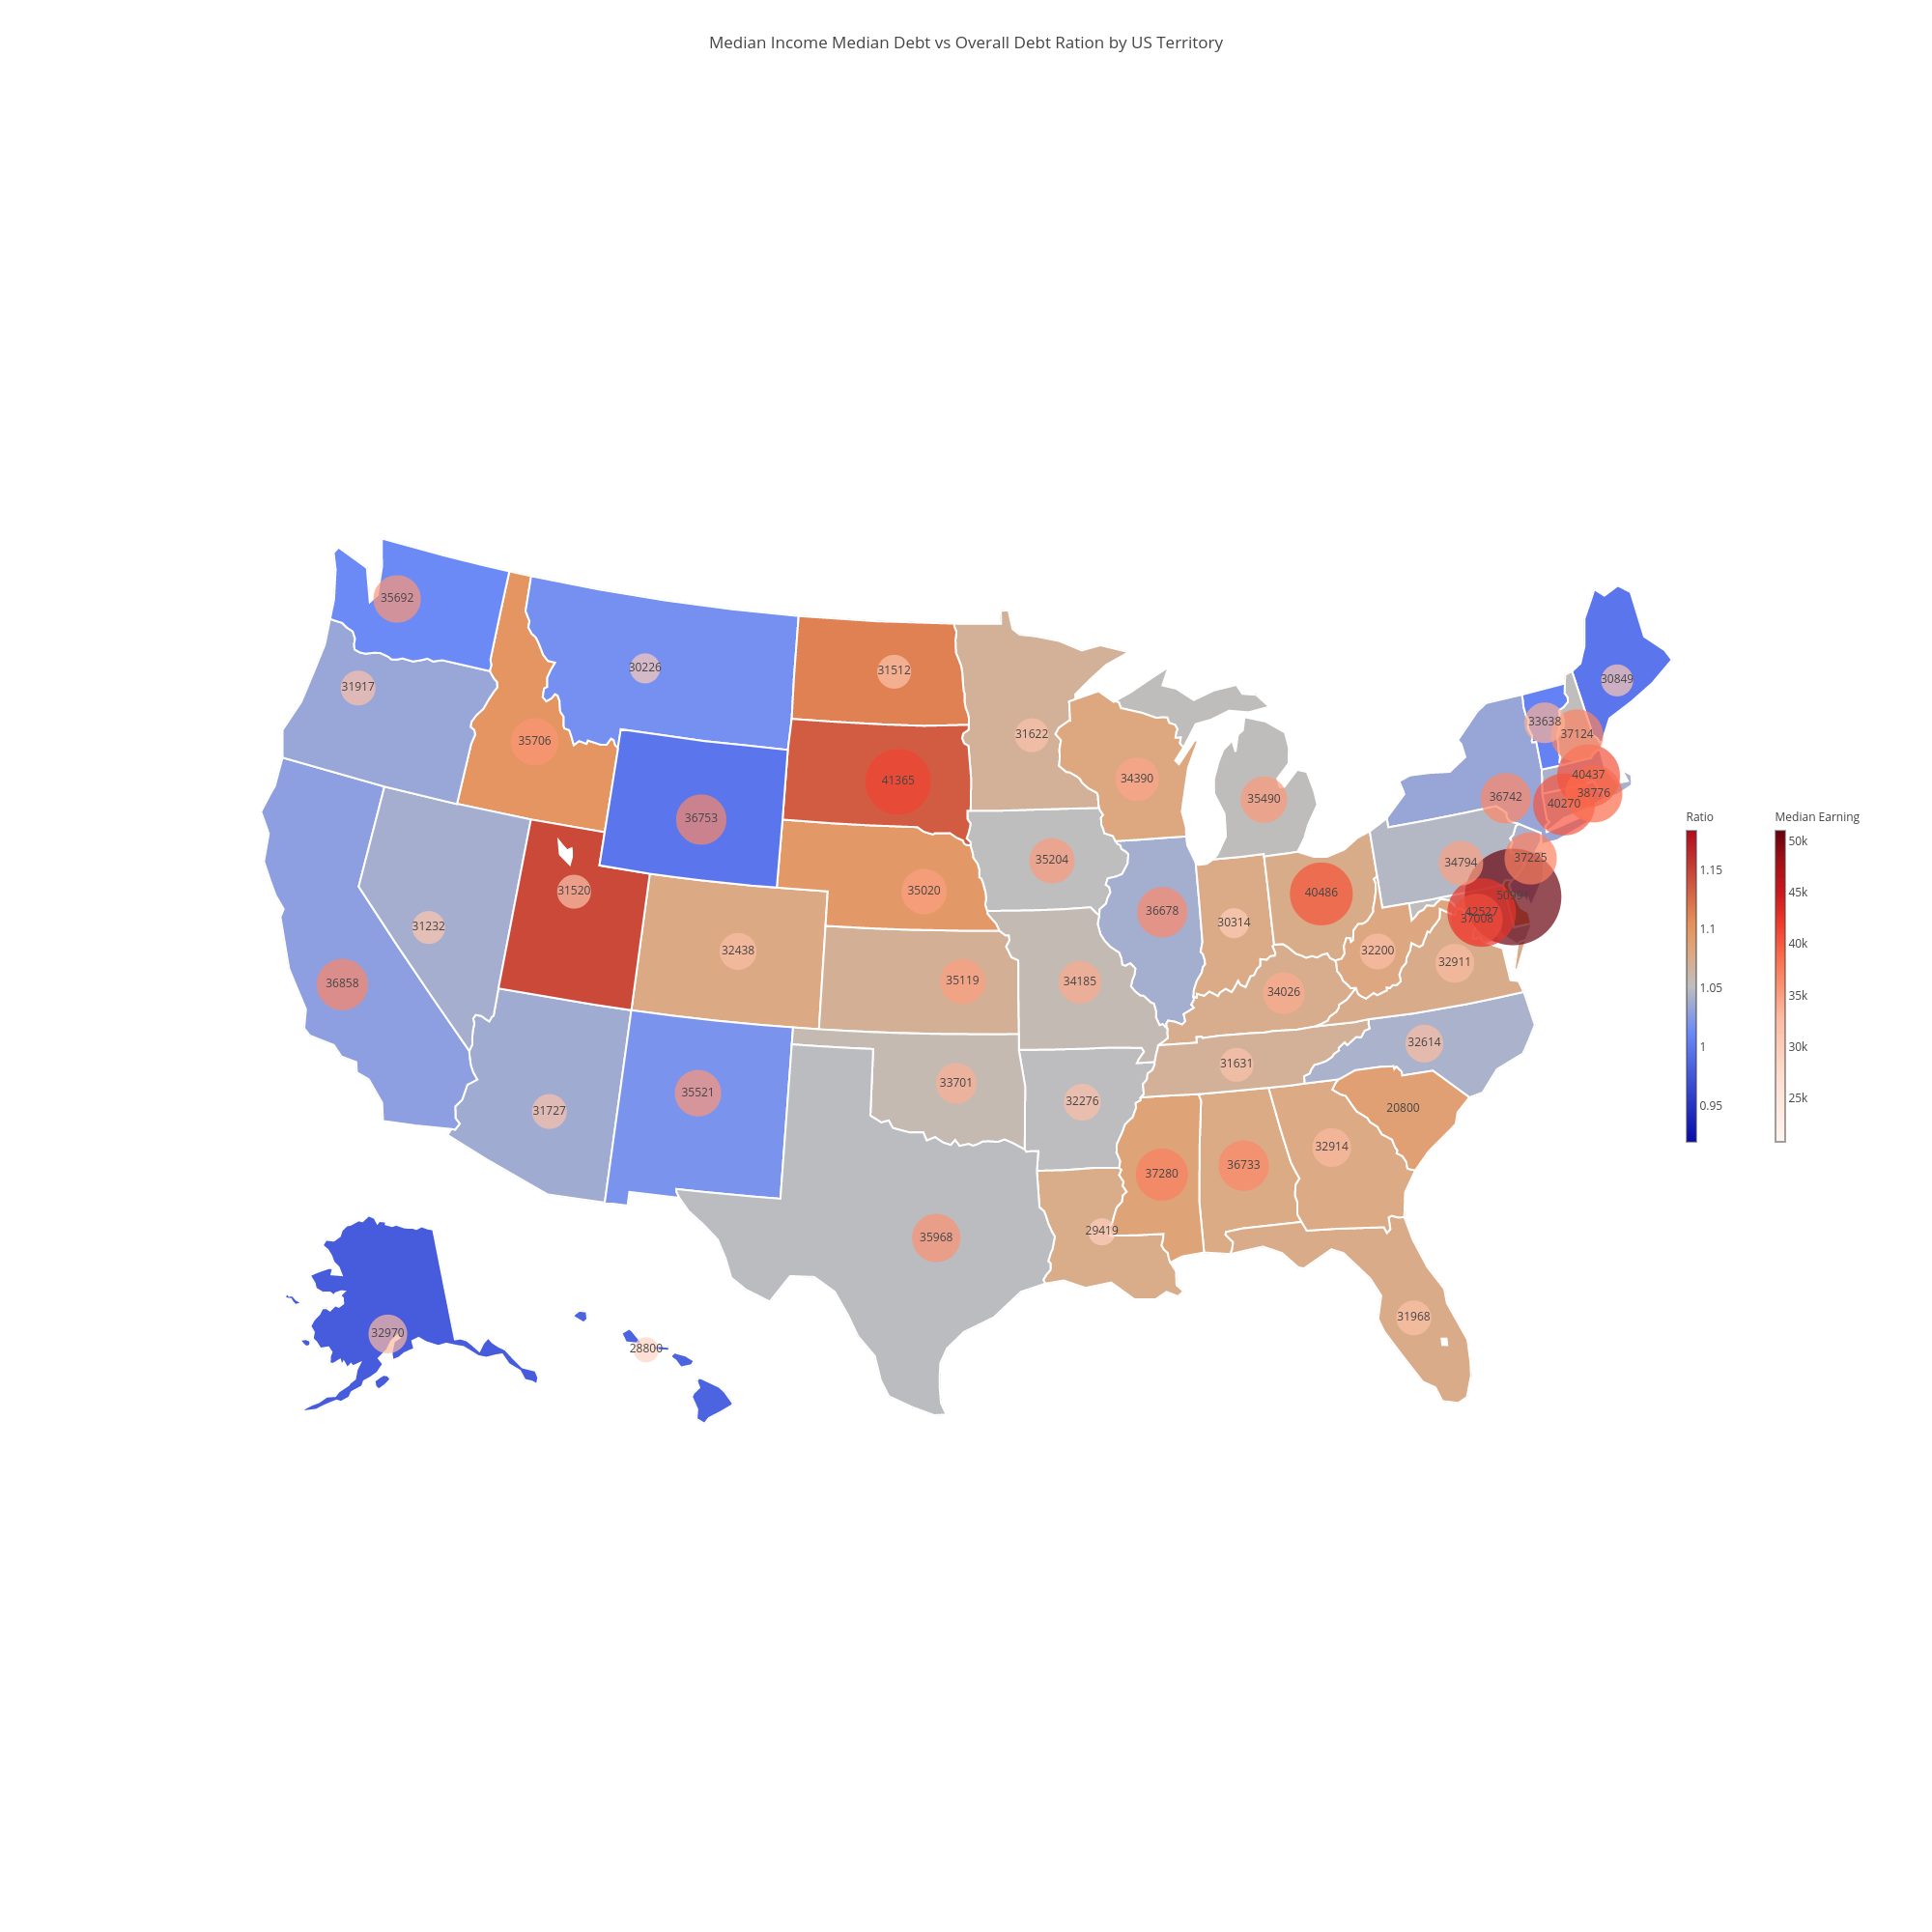

In [157]:
# group data by states and calculate mean by state
MD_MEAN = income.loc[:,["MD_INC_DEBT_RATIO","STABBR", "MD_EARN_WNE_P10"]].groupby("STABBR").mean().reset_index()

size = (MD_MEAN['MD_EARN_WNE_P10']- np.min(MD_MEAN['MD_EARN_WNE_P10']))/(np.max(MD_MEAN['MD_EARN_WNE_P10']) - np.min(MD_MEAN["MD_EARN_WNE_P10"]))*100
size = size.astype(int)

# set map parameters
scale = [[0, 'rgb(255,245,240)'], [0.2, 'rgb(254,224,210)'], [0.4, 'rgb(252,187,161)'], [0.5, 'rgb(252,146,114)'], [0.6, 'rgb(251,106,74)'], [0.7, 'rgb(239,59,44)'], [0.8, 'rgb(203,24,29)'], [0.9, 'rgb(165,15,21)'], [1, 'rgb(103,0,13)']]

map = [ go.Choropleth(
        type='choropleth',
        autocolorscale = False,
        locations = MD_MEAN['STABBR'],
        z = MD_MEAN["MD_INC_DEBT_RATIO"].astype(float),
        locationmode = 'USA-states',
        text = np.array(["Median Earning of studetns after 10 years: " + str(x) for x in MD_MEAN['MD_EARN_WNE_P10']]),
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Ratio",
            x = 0.9,
            thickness = 10,
            len = 0.2)
        ) ,
        go.Scattergeo(
                lon = location["Longitude"],
                lat = location["Latitude"],
                mode = "markers+text",
                text = np.array(MD_MEAN['MD_EARN_WNE_P10']).round(),
                marker = dict(
                        size = size,
                        line = dict(width = 0),
                        autocolorscale = False,
                        colorscale = scale,
                        color = MD_MEAN["MD_EARN_WNE_P10"],
                        cmin = MD_MEAN["MD_EARN_WNE_P10"].min(),
                        cmax = MD_MEAN["MD_EARN_WNE_P10"].max(),
                        colorbar = dict(
                            title = "Median Earning",
                            x = 0.95,
                            thickness = 10,
                            len = 0.2))
                )
        ]

layout = dict(
        title = 'Median Income Median Debt vs Overall Debt Ration by US Territory',
        autosize=False,
        width=2000,
        height=2000,
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
fig = go.Figure(data = map, layout=layout)

py.image.ishow(fig)

**Commentary**  
The reveral of trends between low- and middle-income students is once again present, even in a state-by-state analysis. Many states in the East that once had low debt ratios now have ratios approximately or higher than one. This means that middle-income students find themselves in more debt than the average student paying loans. States on the West coast remain relatively consistent, with Washington, Oregon, and California with a lower debt-ratio than before.

# Data Modeling